# Logistic Regression

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, math
import generate_random_data, generate_graph

In [ ]:
x_data, y_data = generate_random_data.get_logistic_data(50)
df = pd.DataFrame({"Attractiveness": x_data, "Mating Probability": y_data})

In [156]:
def max_likelihood(df: pd.DataFrame, params: np.ndarray) -> float:
    x = df["Attractiveness"].values
    y = df["Mating Probability"].values
    thetaTx = x*params[1] + params[0]
    prediction = 1 / (1 + np.exp(-thetaTx))
    return sum(y * np.log(prediction) + (1-y)*np.log((1-prediction)))


3.047902605389003x + (-1.4446677782664408)
Maximum Likelihood:  -21.35617780042483


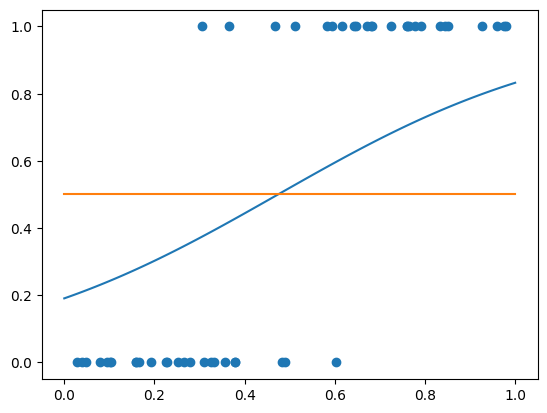

In [157]:
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(df[["Attractiveness"]], df["Mating Probability"])
sklearn_params = np.array([*sklearn_model.intercept_, *sklearn_model.coef_[0]])
print(f"{sklearn_params[1]}x + ({sklearn_params[0]})")
print("Maximum Likelihood: ", max_likelihood(df, sklearn_params))
generate_graph.show_logistic_data(df, sklearn_params)

Calculation Count: 2329
Maximum Likelihood: -11.187803871897286
12.410863758522538x + (-5.768498043306971)


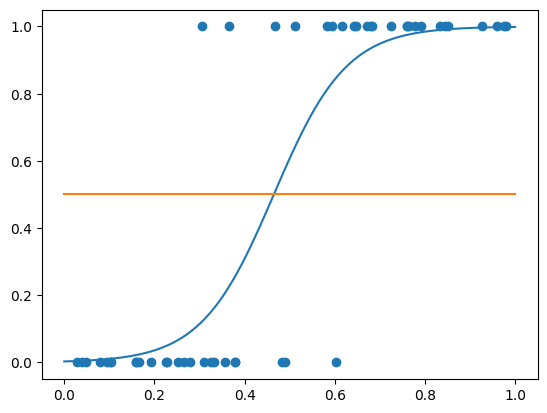

In [163]:
model_params = np.zeros((2,))
x_data = df["Attractiveness"].values
y_data = df["Mating Probability"].values
learning_rate = 0.01
n_calculation = 0
prev_costs = 0
while True:
    thetaTx = model_params[1]*x_data + model_params[0]
    prediction = 1 / (1 + np.exp(-thetaTx))
    errors = (y_data - prediction)
    Xji = np.hstack([np.ones(len(df)).reshape(-1, 1), x_data.reshape(-1, 1)])
    gradients = errors.reshape(1, -1) @ Xji
    temp_params = model_params + learning_rate * gradients
    temp_params = temp_params.flatten()
    curr_costs = max_likelihood(df, temp_params)
    if abs(curr_costs - prev_costs) < 1e-4: break
    prev_costs = curr_costs
    model_params = temp_params
    n_calculation += 1

print("Calculation Count:", n_calculation)
print("Maximum Likelihood:", max_likelihood(df, temp_params))
print(f"{model_params[1]}x + ({model_params[0]})")
generate_graph.show_logistic_data(df, model_params)

In [135]:
math.log(0.7)

-0.35667494393873245

In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, solver='lbfgs')
model.fit(df[["Attractiveness"]], df["Mating Probability"])

from sklearn.metrics import log_loss
preds = model.predict_proba(df[["Attractiveness"]])[:, 1]
print("Sklearn negative log-loss:")
thetaTx = model_params[1]*df["Attractiveness"].values + model_params[0]
my_preds = 1 / (1 + np.exp(-thetaTx))
log_loss(df["Mating Probability"], my_preds)


Sklearn negative log-loss:


0.22375807448520965